In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import rdkit.Chem.AllChem as Chem
import dreams.utils.mols as mu
from rdkit.Chem.MACCSkeys import smartsPatts
from dreams.utils.plots import init_plotting, get_palette, save_fig, get_nature_hex_colors
from dreams.utils.io import wandb_import
from dreams.definitions import MERGED_DATASETS
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
val_dfs, cfgs = wandb_import(project_name='SSL_VAL_4.0', entity_name='mass-spec-ml', include_list_names='mCupuG4hOQ_V7_store_probing')

100%|██████████| 57/57 [00:02<00:00, 27.91it/s]


In [7]:
n_iters = 600

In [17]:
plt.rc('axes', axisbelow=True)

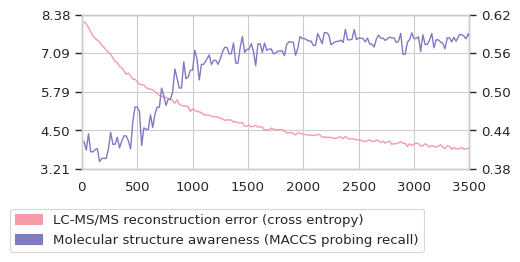

In [22]:
init_plotting(figsize=(5, 2.), font_scale=1.1)
palette = get_nature_hex_colors()

# y = val_dfs[0]['Val spec1 accuracy'][:n_iters]
y = val_dfs[0]['Train loss'][:n_iters]
# y = val_dfs[0]['Val RO loss'][:n_iters]
ax1 = sns.lineplot(x=[e * 10 for e in range(len(y))], y=y, linewidth=1, color=palette[2], zorder=10)
ax1.set_ylabel(None)
# plt.ylim(0, np.nanmax(y))

ax2 = plt.twinx()
y = val_dfs[0]['Probing BinaryRecall (NIST20_MoNA_A_Murcko_split_6k_subset_3, depth=0)'][:n_iters]
sns.lineplot(x=[e * 10 for e in range(len(y))], y=y, linewidth=1, color=palette[4], ax=ax2, zorder=11)
ax2.set_ylabel(None)
# plt.xlabel('Pre-training iteration')
# plt.ylabel('MACCS keys recall (linear probing)')
plt.xlim(0, 3500)
# plt.ylim(0, np.nanmax(y))

ax2.grid(False)
# ax2.right_ax.grid(False)
ax1.set_axisbelow(True)
ax2.set_axisbelow(True)
plt.gca().set_axisbelow(True)

max1 = np.nanmax(ax1.get_ybound())
max2 = np.nanmax(ax2.get_ybound())
min1 = np.nanmin(ax1.get_ybound())
min2 = np.nanmin(ax2.get_ybound())
nticks = 5 #or other odd number
from matplotlib.ticker import FormatStrFormatter
ax1.set_yticks(np.linspace(min1, max1, nticks))
ax2.set_yticks(np.linspace(min2, max2, nticks))
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

import matplotlib.patches as mpatches
handles = [mpatches.Patch(color=colour, label=label) for label, colour in [('LC-MS/MS reconstruction error (cross entropy)', palette[2]), ('Molecular structure awareness (MACCS probing recall)', palette[4])]]
plt.legend(handles=handles, loc='center right', bbox_to_anchor=(0.9, -0.4))
save_fig(dir=None, name='ssl_probing_emergence_full.svg')

In [61]:
probing_dir = Path('/scratch/project/open-26-5/dreams/dreams/experiments/pre_training/SSL_VAL_4.0/mCupuG4hOQ/model_gains/probing/')

# fps_pred_paths = [
#     probing_dir / 'probing_pred_ssl_step=0_probe_epoch=99_batch=10.pt',
#     probing_dir / 'probing_pred_ssl_step=250_probe_epoch=99_batch=10.pt',
#     probing_dir / 'probing_pred_ssl_step=500_probe_epoch=99_batch=10.pt',
#     probing_dir / 'probing_pred_ssl_step=750_probe_epoch=99_batch=10.pt',
#     probing_dir / 'probing_pred_ssl_step=1000_probe_epoch=99_batch=10.pt',
#     probing_dir / 'probing_pred_ssl_step=1250_probe_epoch=99_batch=10.pt',
#     probing_dir / 'probing_pred_ssl_step=1500_probe_epoch=99_batch=10.pt',
#     probing_dir / 'probing_pred_ssl_step=1750_probe_epoch=99_batch=10.pt',
#     probing_dir / 'probing_pred_ssl_step=2000_probe_epoch=99_batch=10.pt',
#     probing_dir / 'probing_pred_ssl_step=3000_probe_epoch=99_batch=10.pt',
# ]
fps_pred_paths = [probing_dir / f'probing_pred_ssl_step={step}_probe_epoch=99_batch=10.pt' for step in range(0, 6000, 250)]
  
fps_pred_loaded = [torch.load(path, map_location=torch.device('cpu')) for path in fps_pred_paths]

O=S(=O)(Nc1cc(Cl)ccc1Oc1ccccc1)c1cccs1


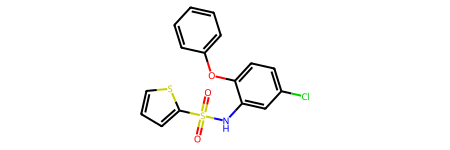

RECALLS [0.3333333333333333, 0.37037037037037035, 0.37037037037037035, 0.2962962962962963, 0.2962962962962963, 0.3333333333333333, 0.4444444444444444, 0.4444444444444444, 0.42592592592592593, 0.42592592592592593, 0.48148148148148145, 0.5555555555555556, 0.7592592592592593, 0.7222222222222222, 0.7777777777777778, 0.5925925925925926, 0.5925925925925926, 0.7037037037037037, 0.7777777777777778, 0.8148148148148148, 0.7222222222222222, 0.7962962962962963, 0.7407407407407407, 0.7777777777777778]
PRECISIONS [0.75, 0.6451612903225806, 0.8, 0.7272727272727273, 0.7619047619047619, 0.8181818181818182, 0.8, 0.8, 0.71875, 0.7931034482758621, 0.6842105263157895, 0.8108108108108109, 0.8367346938775511, 0.75, 0.7924528301886793, 0.7111111111111111, 0.8421052631578947, 0.8085106382978723, 0.875, 0.8627450980392157, 0.8863636363636364, 0.8775510204081632, 0.9523809523809523, 0.9545454545454546]
======================================== 0 0 ========================================
ON KEYS [127 137 143 144 

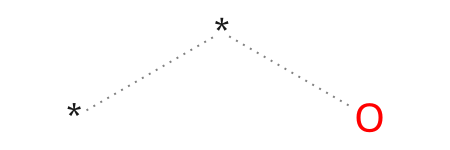

137 [!C;!c;R] 0


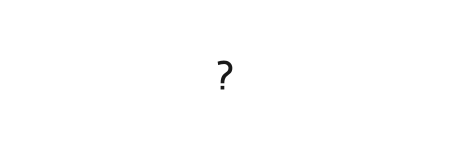

143 *@*!@[#8] 0


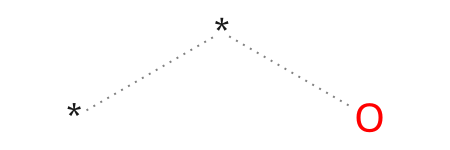

144 *!:*:*!:* 0


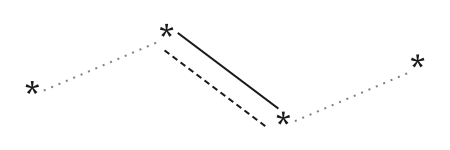

145 *1~*~*~*~*~*~1 1


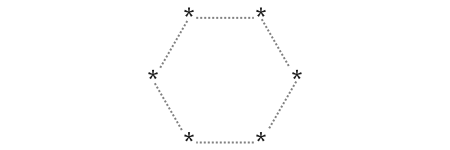

146 [#8] 2


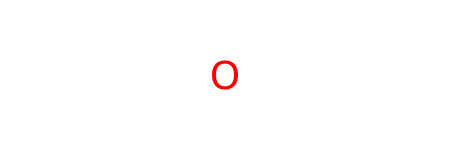

150 *!@*@*!@* 0


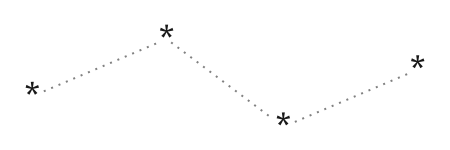

151 [#7;!H0] 0


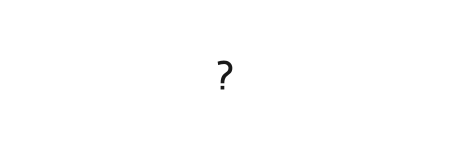

152 [#8]~[#6](~[#6])~[#6] 0


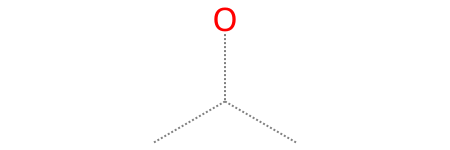

156 [#7]~*(~*)~* 0


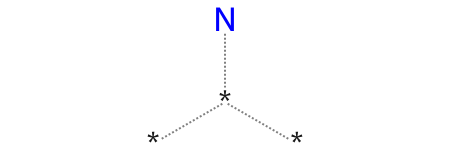

157 [#6]-[#8] 0


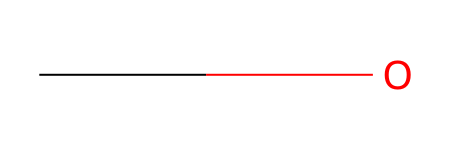

158 [#6]-[#7] 0


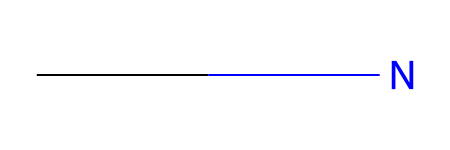

159 [#8] 1


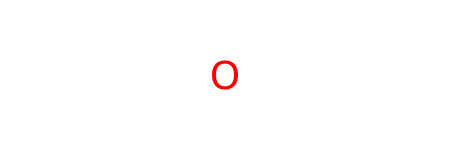

161 [#7] 0


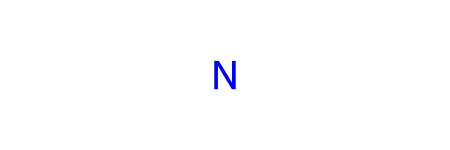

162 a 0


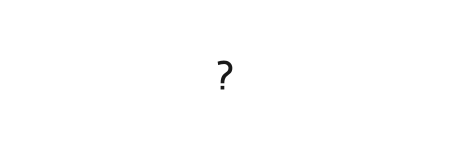

163 *1~*~*~*~*~*~1 0


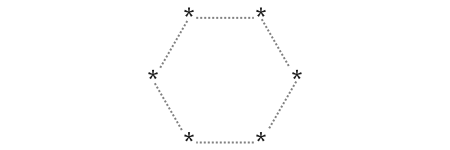

164 [#8] 0


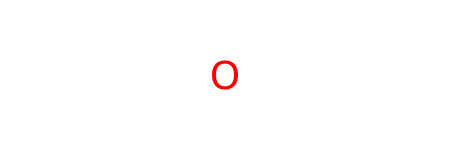

165 [R] 0


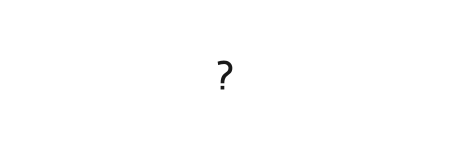

======================================== 1 250 ========================================
ON KEYS [117 127 136 137 143 144 145 146 150 151 152 156 157 158 159 161 162 163
 164 165]
117 [#7]~*~[#8] 0


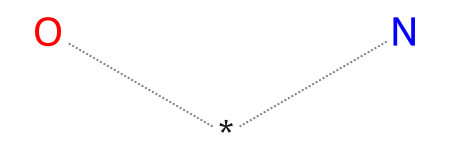

136 [#8]=* 1


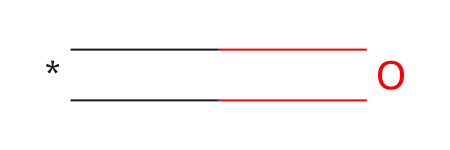

======================================== 2 500 ========================================
ON KEYS [107 117 125 134 136 137 144 145 146 150 151 156 157 158 159 161 162 163
 164 165]
107 [F,Cl,Br,I]~*(~*)~* 0


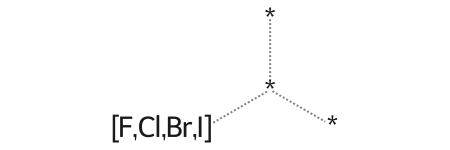

125 ? 0


[17:19:57] SMARTS Parse Error: syntax error while parsing: ?
[17:19:57] SMARTS Parse Error: Failed parsing SMARTS '?' for input: '?'


None

134 [F,Cl,Br,I] 0


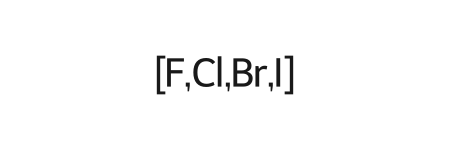

======================================== 3 750 ========================================
ON KEYS [107 125 134 137 145 150 152 156 157 158 159 161 162 163 164 165]
======================================== 4 1000 ========================================
ON KEYS [ 87 107 125 134 137 150 152 156 157 158 159 161 162 163 164 165]
87 [F,Cl,Br,I]!@*@* 0


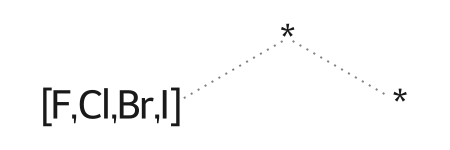

======================================== 5 1250 ========================================
ON KEYS [ 87 107 112 125 133 134 137 145 148 150 156 158 159 161 162 163 164 165]
112 *~*(~*)(~*)~* 0


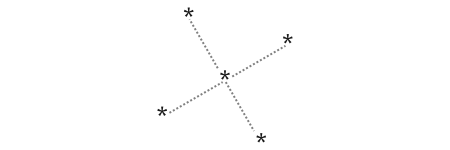

133 *@*!@[#7] 0


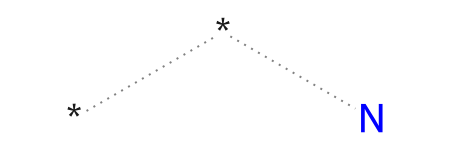

148 *~[!#6;!#1](~*)~* 0


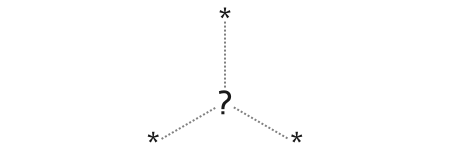

======================================== 6 1500 ========================================
ON KEYS [ 87  96 107 112 124 125 127 130 134 137 143 145 148 150 152 156 157 158
 159 161 162 163 164 165]
96 *1~*~*~*~*~1 0


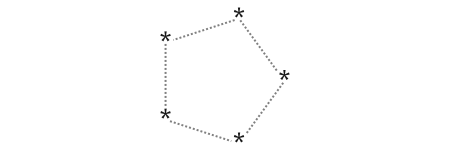

124 [!#6;!#1]~[!#6;!#1] 0


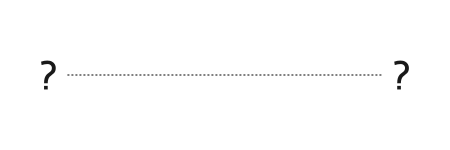

130 [!#6;!#1]~[!#6;!#1] 1


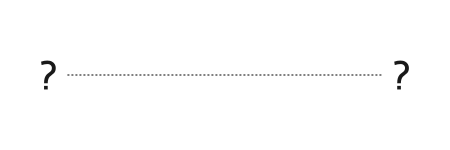

======================================== 7 1750 ========================================
ON KEYS [ 87  96 107 112 124 125 126 134 136 137 145 146 148 150 152 156 157 158
 159 161 162 163 164 165]
126 *!@[#8]!@* 0


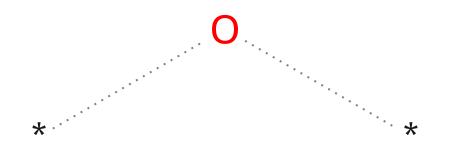

======================================== 8 2000 ========================================
ON KEYS [ 87 103 107 112 117 125 134 137 143 144 145 148 150 151 152 156 158 159
 161 162 163 164 165]
103 Cl 0


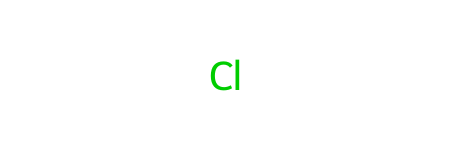

======================================== 9 2250 ========================================
ON KEYS [ 87 103 107 112 117 125 134 136 137 144 145 148 150 151 156 157 158 159
 161 162 163 164 165]
======================================== 10 2500 ========================================
ON KEYS [ 87 103 106 107 112 113 117 125 133 134 135 136 137 144 145 148 150 151
 156 158 159 161 162 163 164 165]
106 [!#6;!#1]~*(~[!#6;!#1])~[!#6;!#1] 0


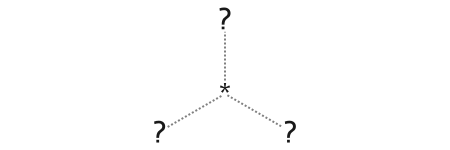

113 [#8]!:*:* 0


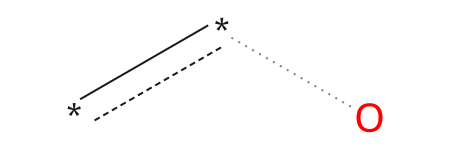

135 [#7]!:*:* 0


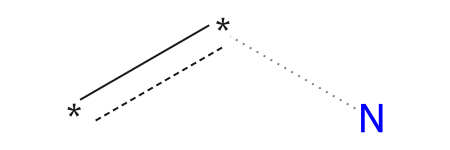

======================================== 11 2750 ========================================
ON KEYS [ 51  59  81  87 103 106 107 112 113 117 124 125 133 134 135 137 144 145
 148 150 151 152 156 158 159 161 162 163 164 165]
51 [#6]~[#16]~[#8] 0


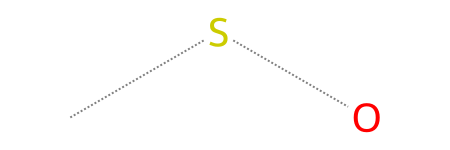

59 [#16]!:*:* 0


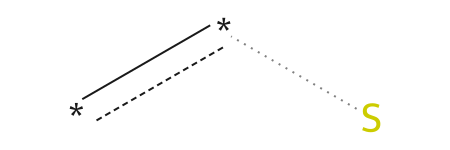

81 [#16]~*(~*)~* 0


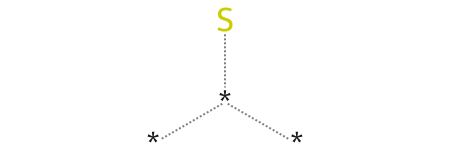

======================================== 12 3000 ========================================
ON KEYS [ 51  55  58  59  61  73  81  87  88  94 102 103 106 107 112 113 117 124
 125 127 130 133 134 135 137 143 144 145 148 150 151 152 156 157 158 159
 161 162 163 164 165]
55 [#8]~[#16]~[#8] 0


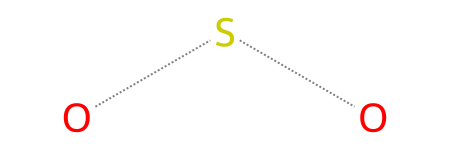

58 [!#6;!#1]~[#16]~[!#6;!#1] 0


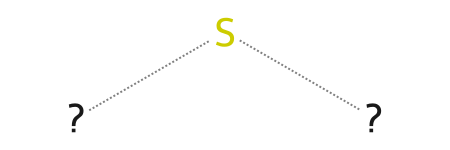

61 *~[#16](~*)~* 0


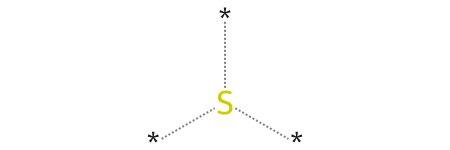

73 [#16]=* 0


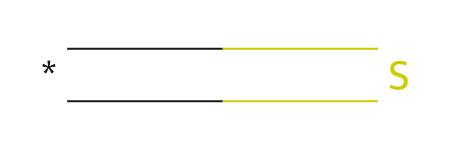

88 [#16] 0


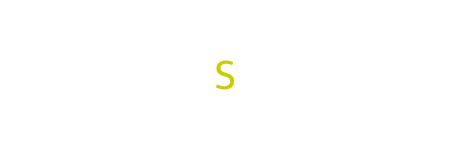

94 [!#6;!#1]~[#7] 0


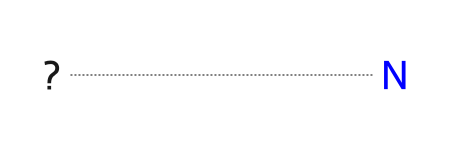

102 [!#6;!#1]~[#8] 0


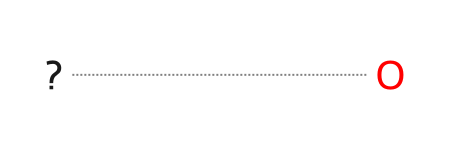

======================================== 13 3250 ========================================
ON KEYS [ 32  51  55  58  59  60  61  64  67  73  81  87  88 102 103 106 107 112
 117 124 125 130 133 134 136 137 144 145 148 151 156 157 158 159 161 162
 163 164 165]
32 [#6]~[#16]~[#7] 0


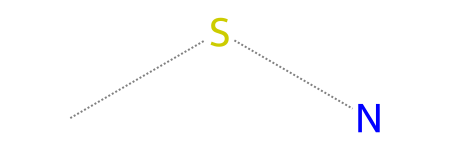

60 [#16]=[#8] 0


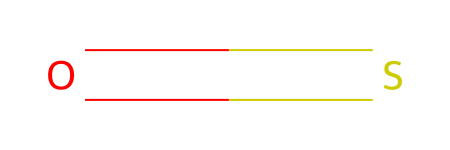

64 *@*!@[#16] 0


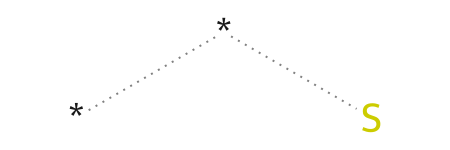

67 [!#6;!#1]~[#16] 0


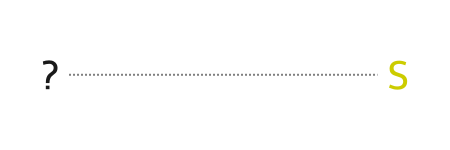

======================================== 14 3500 ========================================
ON KEYS [ 32  33  51  55  58  59  60  61  64  67  69  73  81  87  88  94 102 103
 106 107 112 117 124 125 130 133 134 135 136 137 145 148 151 156 157 158
 159 161 162 163 164 165]
33 [#7]~[#16] 0


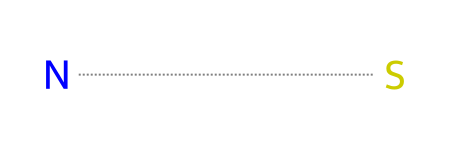

69 [!#6;!#1]~[!#6;!#1;!H0] 0


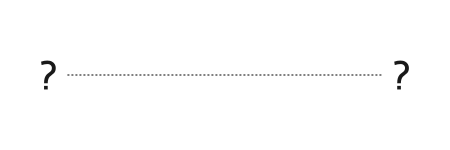

======================================== 15 3750 ========================================
ON KEYS [ 83  87  94  95 103 106 107 112 117 124 125 127 130 133 134 135 136 137
 143 144 145 148 151 156 157 158 159 161 162 163 164 165]
83 [!#6;!#1]1~*~*~*~*~1 0


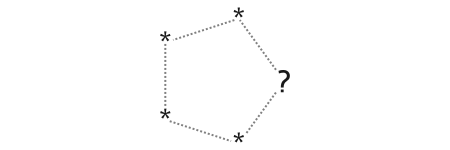

95 [#7]~*~*~[#8] 0


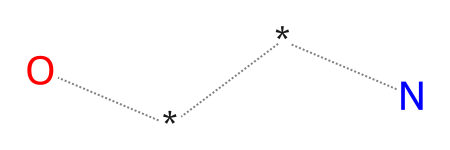

======================================== 16 4000 ========================================
ON KEYS [ 32  81  87  88  94  95 102 103 106 107 112 117 124 125 130 133 134 136
 137 143 145 148 151 156 157 158 159 161 162 163 164 165]
======================================== 17 4250 ========================================
ON KEYS [ 51  55  58  59  60  61  69  73  81  87  88  94 102 103 106 107 112 117
 124 125 130 133 134 135 136 137 145 148 151 156 157 158 159 161 162 163
 164 165]
======================================== 18 4500 ========================================
ON KEYS [ 32  33  51  55  58  59  60  61  64  67  69  73  81  87  88  94 102 106
 107 112 117 124 125 130 133 134 135 136 144 145 148 150 151 156 157 158
 159 161 162 163 164 165]
======================================== 19 4750 ========================================
ON KEYS [ 32  33  51  55  58  59  60  61  64  67  69  73  81  87  88  94 102 103
 106 107 112 117 124 125 126 130 133 134 135 136 144 145 148 150 151 156
 15

In [62]:
from sklearn.metrics import recall_score, precision_score

for i in range(len(fps_pred_loaded[0]['smiles'])):
    assert len(set([fps['smiles'][i] for fps in fps_pred_loaded])) == 1
    smiles = fps_pred_loaded[0]['smiles'][i]
    mol = Chem.MolFromSmiles(smiles)
    fp = mu.maccs_fp(mol)

    fps_pred = [fps['fps_pred'][i].numpy().round() for fps in fps_pred_loaded]
    recalls = [recall_score(fp, fp_pred) for fp_pred in fps_pred]
    precisions = [precision_score(fp, fp_pred) for fp_pred in fps_pred]

    # display(mol)
    # print(smiles)
    # print('RECALLS', recalls)

    # # batch 10
    if smiles == 'O=S(=O)(Nc1cc(Cl)ccc1Oc1ccccc1)c1cccs1':
        print(smiles)
        display(mol)
        print('RECALLS', recalls)
        print('PRECISIONS', precisions)
        for iter_i, fp_pred in enumerate(fps_pred):
            step_i = fps_pred_paths[iter_i].stem.split('=', 1)[1].split('_', 1)[0]
            print('=' * 40, iter_i, step_i, '=' * 40)
            on_keys_mask = fp_pred.astype(bool) & fp.astype(bool)
            print('ON KEYS', np.where(on_keys_mask)[0] + 1)
            for iter_prev in range(iter_i):
                iter_prev = iter_i - iter_prev - 1
                on_keys_mask = on_keys_mask & ~fps_pred[iter_prev].astype(bool)
            on_keys = np.where(on_keys_mask)[0] + 1
            for key_i in on_keys:
                k, count = smartsPatts[key_i]
                print(key_i, k, count)
                display(Chem.MolFromSmarts(k))